thyroid dataset

In [505]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
#from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  names = np.unique(labels)
  #print() 
  df_cm = pd.DataFrame(cm, names,names)
  print(cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(df_cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
train = pd.read_csv('ann-train.data', header=None, sep=" ") 
y_train=train[21]
train.drop([21,22,23],axis=1, inplace=True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [506]:
print("Classes -> number of representatives:")
print(y_train.value_counts())
times_class1 = y_train.value_counts()[3]//y_train.value_counts()[1]
times_class2 = y_train.value_counts()[3]//y_train.value_counts()[2]
print("Times more needed for class 1 -> ", times_class1)
print("Times more needed for class 2 -> ", times_class2)

Classes -> number of representatives:
3    3488
2     191
1      93
Name: 21, dtype: int64
Times more needed for class 1 ->  37
Times more needed for class 2 ->  18


Create more records for underrepresented classes 

In [507]:

class1indexes = y_train.loc[y_train == 1]
class2indexes = y_train.loc[y_train == 2]

#class2indexes.head()

class1 = train.loc[class1indexes.index]
class2 = train.loc[class2indexes.index]
print("Class 1: ",class1.shape)
print("Class 2: ",class2.shape)
pad1 = class1.reset_index(drop=True)
#print(pad.shape)
pad1 = pd.concat([pad1 for i in range(times_class1-1)],
          ignore_index=True)

pad1[21] = pd.Series(1, index=pad1.index) # add class label 1
#class1labels = 
print("Shape of padded class 1 with label: ", pad1.shape)
#pad1.head()
pad2 = class2.reset_index(drop=True)
pad2 = pd.concat([pad2 for i in range(times_class2-1)],
          ignore_index=True)

pad2[21] = pd.Series(2, index=pad2.index) # add class label 1
print("Shape of padded class 2 with label: ", pad2.shape)
pad2.head()

Class 1:  (93, 21)
Class 2:  (191, 21)
Shape of padded class 1 with label:  (3348, 22)
Shape of padded class 2 with label:  (3247, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.62,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.01100,0.008,0.073,0.074,0.09800,2
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.00979,0.004,0.081,0.064,0.12600,2
2,0.56,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.00820,0.020,0.066,0.094,0.07000,2
3,0.78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00630,0.011,0.056,0.086,0.06500,2
4,0.69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00680,0.022,0.077,0.100,0.07692,2


Append repeated records of class 1 and 2  to the training dataframe.


In [508]:
print("Training data shape: ",train.shape)
train[21] = y_train
print("Training data shape with yZ: ",train.shape)
train = train.append(pad1,ignore_index=True).append(pad2,ignore_index=True).sample(frac=1)
#train.reset_index(inplace=True, drop=True)
print("New Training data shape: ",train.shape)
train.head()

Training data shape:  (3772, 21)
Training data shape with yZ:  (3772, 22)
New Training data shape:  (10367, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
8137,0.27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.01500,0.016,0.082,0.082,0.100,2
10011,0.58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00750,0.016,0.082,0.108,0.077,2
4754,0.74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.02200,0.012,0.071,0.111,0.064,1
8156,0.07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00730,0.016,0.064,0.097,0.066,2
1288,0.51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00208,0.020,0.096,0.095,0.101,3


In [509]:
# keep the class labels of training dataframe
y_train=train[21]
print("yZ of training data shape: ",y_train.shape)
# remove lables from training dataframe
train.drop([21],axis=1, inplace=True)
print("training data shape: ",train.shape)
print("Classes -> number of representatives:")
print(y_train.value_counts())


yZ of training data shape:  (10367,)
training data shape:  (10367, 21)
Classes -> number of representatives:
3    3488
1    3441
2    3438
Name: 21, dtype: int64


In [510]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
train.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
8137,-1.276538,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.277260,0.008097,0.071835,-1.042146,0.490054
10011,0.354068,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.375028,0.008097,0.071835,0.388349,-0.062531
4754,1.195672,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.186010,-0.491017,-0.190980,0.553407,-0.374861
8156,-2.328543,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.377635,0.008097,-0.358226,-0.216860,-0.326810
1288,-0.014133,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.445681,0.507210,0.406326,-0.326898,0.514079


In [511]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,...,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04
mean,2.559928e-16,-3.906717e-17,1.370778e-17,-1.782011e-17,-4.797723e-18,-3.632561e-17,3.769639e-17,-1.919089e-17,1.096622e-17,-1.507856e-17,...,-2.673017e-17,1.644934e-17,-3.289867e-17,3.084250e-18,3.015711e-17,-2.810095e-17,-2.919757e-16,-2.810095e-16,3.426945e-18,1.130892e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,...,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-2.644144e+00,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-4.727955e-01,-1.925968e+00,-1.839545e+00,-4.508346e+00,-1.864437e+00
25%,-8.031364e-01,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-4.456812e-01,-7.405735e-01,-7.405017e-01,-6.570125e-01,-6.871914e-01
50%,1.436676e-01,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-3.503902e-01,1.328751e-01,9.572689e-02,-5.180293e-02,1.056473e-01
75%,7.748702e-01,1.706913e+00,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-6.868852e-02,5.820772e-01,6.452485e-01,5.534066e-01,6.822572e-01
max,2.247676e+00,1.706913e+00,3.484167e+00,1.013262e+01,1.310661e+01,5.497809e+00,1.395005e+01,9.015419e+00,7.522928e+00,2.918860e+00,...,1.694025e+01,1.769609e+01,6.126911e+00,1.018136e+02,5.585307e+00,6.436130e+00,1.122567e+01,8.386336e+00,7.210712e+00,1.279107e+01


In [512]:
test = pd.read_csv('ann-test.data', header=None, sep=" ") 
y_test=test[21]
test.drop([21,22,23],axis=1, inplace=True)
print("test data shape: ",test.shape)
print("Classes -> number of representatives:")
print(y_test.value_counts())
test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)
test.head()


test data shape:  (3428, 21)
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.171338,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.393278,1.505437,0.764710,1.653788,0.129673
1,-1.013537,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.455849,0.382432,0.119619,-1.262222,0.658232
2,-0.855737,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.472795,1.879772,3.822917,-0.051803,3.829586
3,-1.592140,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.459760,0.257653,0.191296,-0.712032,0.466028
4,-1.539539,-0.585853,-0.287013,-0.098691,-0.076297,5.497809,-0.071684,-0.110921,-0.132927,-0.3426,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.467581,0.756767,1.314231,1.873864,0.466028


In [513]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_test_one_hot = lb.transform(y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(10367, 3)
Test labels dimension:
(3428, 3)
[1 0 0]


In [514]:
# Defining various initialization parameters for 21-32-32-1 MLP model
from keras.metrics import categorical_accuracy

num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 32; num_layers_1 = 32

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
# Fit keras model
history = model.fit(train, y_train_one_hot, epochs=8, batch_size=2, validation_split = 0.20)

Train on 8293 samples, validate on 2074 samples
Epoch 1/8
8293/8293 [==============================] - 10s 1ms/step - loss: 0.4305 - categorical_accuracy: 0.7934 - val_loss: 0.3266 - val_categorical_accuracy: 0.8689
Epoch 2/8
8293/8293 [==============================] - 8s 946us/step - loss: 0.2651 - categorical_accuracy: 0.8883 - val_loss: 0.2135 - val_categorical_accuracy: 0.9272
Epoch 3/8
8293/8293 [==============================] - 8s 1ms/step - loss: 0.1563 - categorical_accuracy: 0.9445 - val_loss: 0.1595 - val_categorical_accuracy: 0.9474
Epoch 4/8
8293/8293 [==============================] - 7s 880us/step - loss: 0.1011 - categorical_accuracy: 0.9688 - val_loss: 0.0868 - val_categorical_accuracy: 0.9807
Epoch 5/8
8293/8293 [==============================] - 7s 858us/step - loss: 0.0971 - categorical_accuracy: 0.9748 - val_loss: 0.1197 - val_categorical_accuracy: 0.9778
Epoch 6/8
8293/8293 [==============================] - 7s 851us/step - loss: 0.0877 - categorical_accuracy: 0.

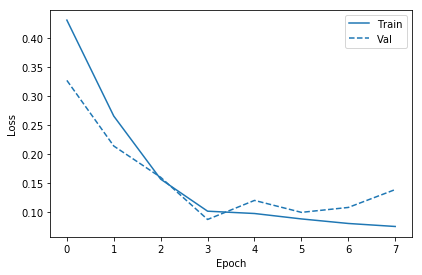

In [515]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss'])

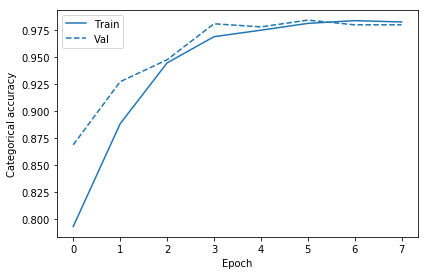

In [516]:
plot_metrics(history,  metrics =  ['categorical_accuracy']) 

In [517]:
y_test_predictions = model.predict_classes(test, batch_size=1)
baseline_results = model.evaluate(test, y_test_one_hot,
                                  batch_size=2, verbose=1)

#y_test_predictions_one_hot = lb.transform(y_test_predictions)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
print(baseline_results)


3428/3428 [==============================] - 1s 404us/step
loss :  0.23861478983296372

categorical_accuracy :  0.9515752625437572

[0.23861478983296372, 0.9515752625437572]


In [518]:
#y_test_predictions = y_test_predictions+1
y_test_predictions

array([1, 2, 2, ..., 2, 2, 2])

In [519]:
y_test.values

array([2, 3, 3, ..., 3, 3, 3])

[[  65    3    5]
 [   0  160   17]
 [  26  115 3037]]
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


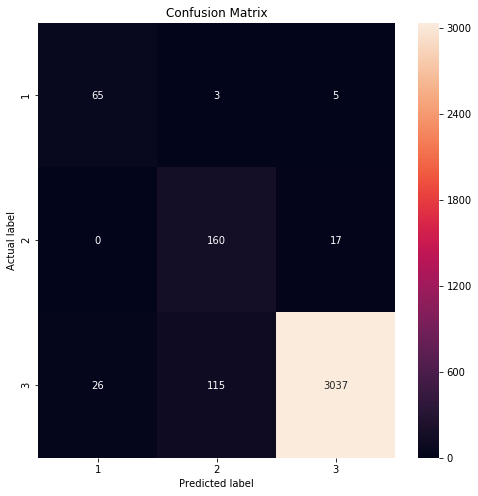

In [520]:
plot_cm(y_test.values, y_test_predictions+1)
print("Classes -> number of representatives:")
print(y_test.value_counts())

3 dense layers model

In [521]:
# Define the keras model 21-16-32-16-1 MLP model
model2 = Sequential()
model2.add(Dense(16, input_dim=21, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(3, activation='sigmoid'))

# Compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])
# Fit keras model
history2 = model2.fit(train, y_train_one_hot, epochs=64, validation_split = 0.20)

Train on 8293 samples, validate on 2074 samples
Epoch 1/64
8293/8293 [==============================] - 2s 280us/step - loss: 0.8508 - categorical_accuracy: 0.6296 - val_loss: 0.5808 - val_categorical_accuracy: 0.7705
Epoch 2/64
8293/8293 [==============================] - 0s 59us/step - loss: 0.4885 - categorical_accuracy: 0.7911 - val_loss: 0.4324 - val_categorical_accuracy: 0.7994
Epoch 3/64
8293/8293 [==============================] - 1s 70us/step - loss: 0.3986 - categorical_accuracy: 0.8126 - val_loss: 0.3769 - val_categorical_accuracy: 0.8235
Epoch 4/64
8293/8293 [==============================] - 1s 63us/step - loss: 0.3530 - categorical_accuracy: 0.8370 - val_loss: 0.3371 - val_categorical_accuracy: 0.8423
Epoch 5/64
8293/8293 [==============================] - 1s 66us/step - loss: 0.3203 - categorical_accuracy: 0.8548 - val_loss: 0.3090 - val_categorical_accuracy: 0.8558
Epoch 6/64
8293/8293 [==============================] - 1s 64us/step - loss: 0.2904 - categorical_accuracy

Epoch 49/64
8293/8293 [==============================] - 1s 71us/step - loss: 0.0179 - categorical_accuracy: 0.9943 - val_loss: 0.0408 - val_categorical_accuracy: 0.9908
Epoch 50/64
8293/8293 [==============================] - 1s 77us/step - loss: 0.0184 - categorical_accuracy: 0.9948 - val_loss: 0.0440 - val_categorical_accuracy: 0.9908
Epoch 51/64
8293/8293 [==============================] - 1s 67us/step - loss: 0.0173 - categorical_accuracy: 0.9949 - val_loss: 0.0503 - val_categorical_accuracy: 0.9884
Epoch 52/64
8293/8293 [==============================] - 1s 63us/step - loss: 0.0162 - categorical_accuracy: 0.9957 - val_loss: 0.0480 - val_categorical_accuracy: 0.9913
Epoch 53/64
8293/8293 [==============================] - 1s 70us/step - loss: 0.0168 - categorical_accuracy: 0.9945 - val_loss: 0.0401 - val_categorical_accuracy: 0.9928
Epoch 54/64
8293/8293 [==============================] - 1s 72us/step - loss: 0.0175 - categorical_accuracy: 0.9958 - val_loss: 0.0419 - val_categoric

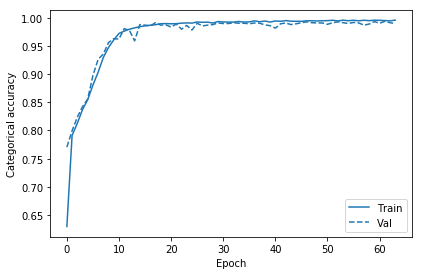

In [522]:
plot_metrics(history2, metrics =  ['categorical_accuracy'])

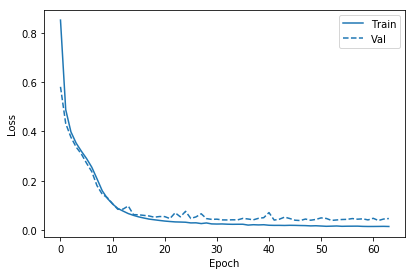

In [523]:
plot_metrics(history2, metrics =  ['loss'])

3428/3428 [==============================] - 3s 838us/step
loss :  0.2175124041547177

categorical_accuracy :  0.9571178529754959

[[  64    9    0]
 [   1  161   15]
 [  29   93 3056]]


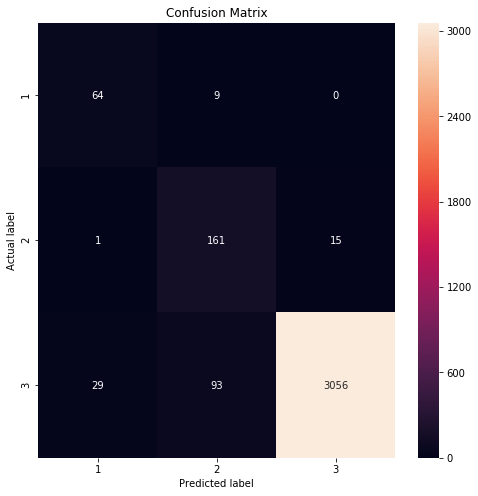

In [524]:
y_test_predictions = model2.predict_classes(test, batch_size=1)
baseline_results = model2.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
plot_cm(y_test.values, y_test_predictions+1)
